#### General Steps to Follow

1. Importing Packages
2. Getting the Happy and Sad Images
3. Resizing the Images
4. Normalizing the Images
5. Adding Labels
6. Defining Data
7. Defining train and test data

## 1) Importing Packages

In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 2) Getting the Happy and Sad Images

#### Setup Paths

In [2]:
happy_path = "../my data/happy" # path of happy images folder
sad_path = "../my data/sad"     # path of sad images folder

* In the EDA process, i found 23 images have 4 channels and 3 grayscale images. I will ignore them
* The rest of images are RGB

In [3]:
# Save memory
del happy
del sad

happy = []  # Happy Images(ONLY RGB)
sad = []    # Sad Images(ONLY RGB)

# happy images
for img_name in os.listdir(happy_path):
    path = happy_path + "/" + img_name
    image = plt.imread(path)
    try:
        if(image.shape[2] == 4):
            continue
    except:
        continue
    happy.append(image)
    del image
    del path
        
# sad images
for img_name in os.listdir(sad_path):
    path = sad_path + "/" + img_name
    image = plt.imread(path)
    try:
        if(image.shape[2] == 4):
            continue
    except:
        continue
    sad.append(image)
    del image
    del path

print("Number of RGB happy images =", len(happy))
print("Number of RGB sad images =", len(sad))

Number of RGB happy images = 5383
Number of RGB sad images = 3216


### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 3) Resizing the Images

* I will resize all the images to have a shape of (100, 100, 3)

In [4]:
shape = (100,100)

In [5]:
# Save memory
del happy_resized
del sad_resized

happy_resized = []  # Resized happy images
sad_resized = []    # Resized sad images


# Happy images
for image in happy:
    img = cv2.resize(image,shape)
    happy_resized.append(img)
    del img
    
# Sad images
for image in sad:
    img = cv2.resize(image,shape)
    sad_resized.append(img)
    del img

happy_resized = np.array(happy_resized)
sad_resized = np.array(sad_resized)

In [6]:
happy_resized[10].shape

(100, 100, 3)

In [7]:
sad_resized[10].shape

(100, 100, 3)

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 4) Normalizing the Images

* I will scale the images by multiplying every pixel value by (1/255).
* Some of the images are already normalized. So, i will skip these images.

In [8]:
m = len(happy_resized)
for i in range(m):
    if happy_resized[i].max() > 1:
        happy_resized[i] = happy_resized[i] /255

m = len(sad_resized)
for i in range(m):
    if sad_resized[i].max() > 1:
        sad_resized[i] = sad_resized[i] /255

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 5) Adding Labels

* I will label images using this convention:
    - Happy Images: 1
    - Sad Images  : 0

In [9]:
# Save memory
del happy_data
del sad_data

happy_data = []  # Happy Images and their labels
sad_data = []    # Sad Images and their labels

for image in happy_resized:
    happy_data.append([image,1])

for image in sad_resized:
    sad_data.append([image,0])
    
happy_data = np.array(happy_data,dtype = object)
sad_data = np.array(sad_data,dtype = object)

##### Visualizing the some images 

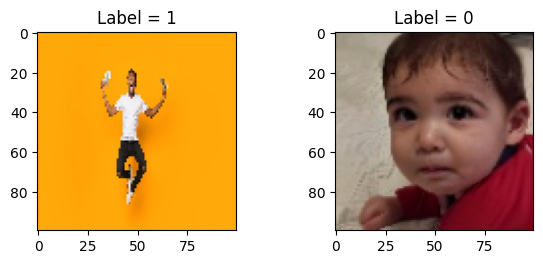

In [10]:
fig, ax = plt.subplots(1,2)

# Adjust the horizontal and vertical spacing
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Plotting a happy image
image = happy_data[15,0]
label = happy_data[15,1]
ax[0].imshow(image); ax[0].set_title("Label = %d" % label)

#save memory
del image

# Plotting a sad image
image = sad_data[101,0]
label = sad_data[101,1]
ax[1].imshow(image); ax[1].set_title("Label = %d" % label)

#save memory
del image

plt.show()

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 5) Defining Data

In [11]:
data = np.concatenate((happy_data, sad_data), axis = 0)

##### data contains 5383 happy images and 3216 sad images. I will shuffle the elements to randomize their order

In [36]:
np.random.shuffle(data)

##### Visualizing the some images 

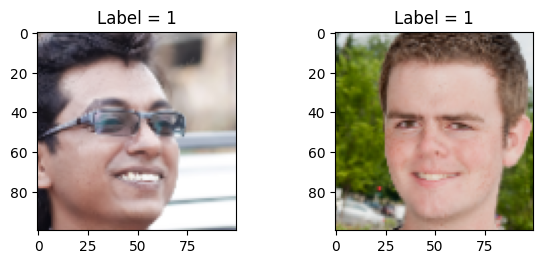

In [37]:
fig, ax = plt.subplots(1,2)

# Adjust the horizontal and vertical spacing
plt.subplots_adjust(wspace=0.5, hspace=0.5)

image = data[101,0]
label = data[101,1]
ax[0].imshow(image); ax[0].set_title("Label = %d" % label)

#save memory
del image

image = data[389,0]
label = data[389,1]
ax[1].imshow(image); ax[1].set_title("Label = %d" % label)

#save memory
del image

plt.show()

#### Saving the data into "my data" folder

In [38]:
np.save("../my data/data.npy", data)

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

## 5) Defining train and test data

##### Splitting the data: 80% training data, 20% test data 

In [39]:
len(data)

8599

In [40]:
train_data = data[:6897]
test_data = data[6897:]

In [41]:
len(train_data)

6897

In [42]:
len(test_data)

1702

##### Checking the labels in train and test data

In [43]:
one_train = 0
zero_train = 0
one_test = 0
zero_test = 0

for x in train_data:
    if x[1] == 1:
        one_train += 1
    else:
        zero_train += 1

for x in test_data:
    if x[1] == 1:
        one_test += 1
    else:
        zero_test += 1
        
print("Number of 'label = 1' in train data =", one_train)
print("Number of 'label = 0' in train data =", zero_train)
print("Number of 'label = 1' in test data  =", one_test)
print("Number of 'label = 0' in test data  =", zero_test)

Number of 'label = 1' in train data = 4349
Number of 'label = 0' in train data = 2548
Number of 'label = 1' in test data  = 1034
Number of 'label = 0' in test data  = 668


##### Saving "train_data" and "test_data" arrays into "my data" folder 

In [44]:
np.save("../my data/train_data.npy", train_data)
np.save("../my data/test_data.npy", test_data)

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

### Deleting Varaibles After Finishing this notebook to save memory

In [45]:
del happy
del sad
del happy_resized
del sad_resized
del happy_data
del sad_data
del train_data
del test_data